# **Pràctica 3: Transformació d'una distribució**

<hr>

**[1] Nom:**

**[1] NIU:**

**[1] mail (gmail):**

<hr>

**[2] Nom:**

**[2] NIU:**

**[2] mail (gmail):**

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr3_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr3_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr3_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr3_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>

**Objectiu de la pràctica**

Emprar el mètode de transformació per transformar nombres aleatoris entre [0,1] perquè segueixin una distribució determinada.

En particular, en aquesta pràctica generarem nombres aleatoris que segueixin una distribució amb aquesta forma, entre $0$ i $\pi$:

$$
  f(x) = \frac{1}{2} sin(x)
$$

El factor 2 prové de la integral analítica de $sin(x)$, així obtenim una normalització adequada de $f(x)$, és a dir, que la seva integral entre 0 i $\pi$ sigui 1:

$$
    \int^\pi_0 sin(x)dx = \left . -\cos (x) \right|^\pi_0 = 2
$$

La funció acumulativa és la integral de $f(x)$, que si ho expressem en funció de $x$, ens queda de forma analítica:

$$
    F(x) = \int^x_0 f(x')dx' = \frac{1}{2}\int^x_0 sin(x')dx' = \frac{1}{2}(\left . -\cos x' \right|^x_0) = \frac{1}{2}(1 - cos(x))
$$
<hr>

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### <font color='orange'>**> Python #1**</font>

Primer farem les gràfiques de f(x) i F(x). Defineix les funcions i grafica-les per x $\in$[0,$\pi$]:

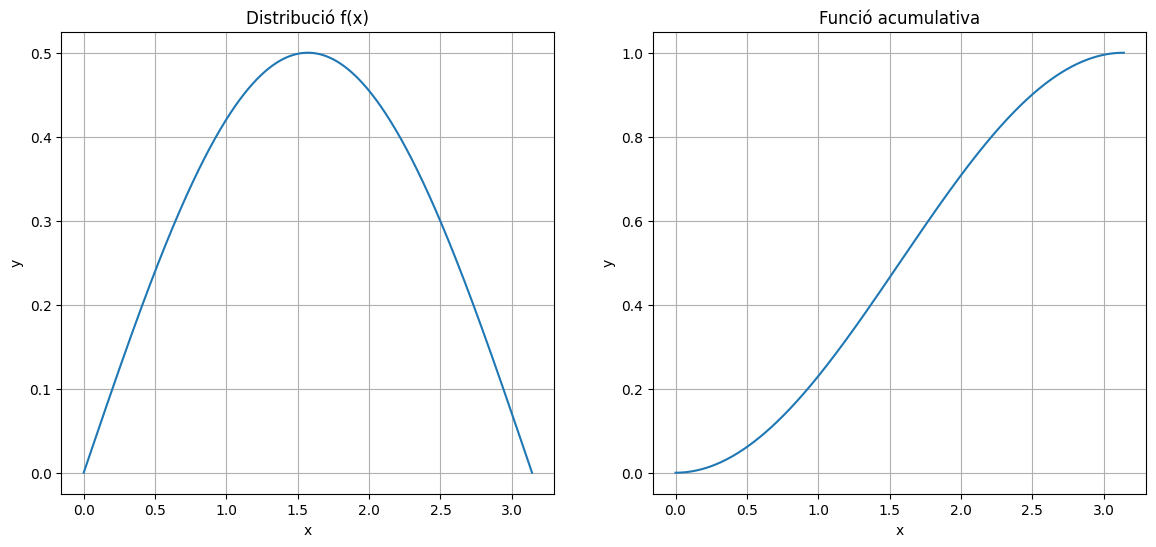

In [87]:
def distribucio(x):
  y = 0.5 * np.sin(x)
  return y

def acumulativa(x):
  y = 0.5 * (1-np.cos(x))
  return y

x = np.linspace(0, np.pi, 500)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x, distribucio(x))
plt.title('Distribució f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, acumulativa(x))
plt.title('Funció acumulativa')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

### <font color='orange'>**> Python #2**</font>

Per utilitzar el mètode de transformació, podem expressar F(x) com $u = F(x)$. Si invertim $F(x)$, obtenim:

$$
  x = arccos(1 - 2u)
$$

Si $u$ està distribuït uniformement entre 0 i 1, llavors $x$ estarà distribuït d'acord amb $f(x)$ entre 0 i $\pi$.

Crea una col·lecció de $10^6$ nombres aleatoris distribuïts de forma uniforme entre 0 i 1. Utilitza aquests valors per transformant-los amb aquesta funció. Dibuixa un histograma d'aquests valors transformats.

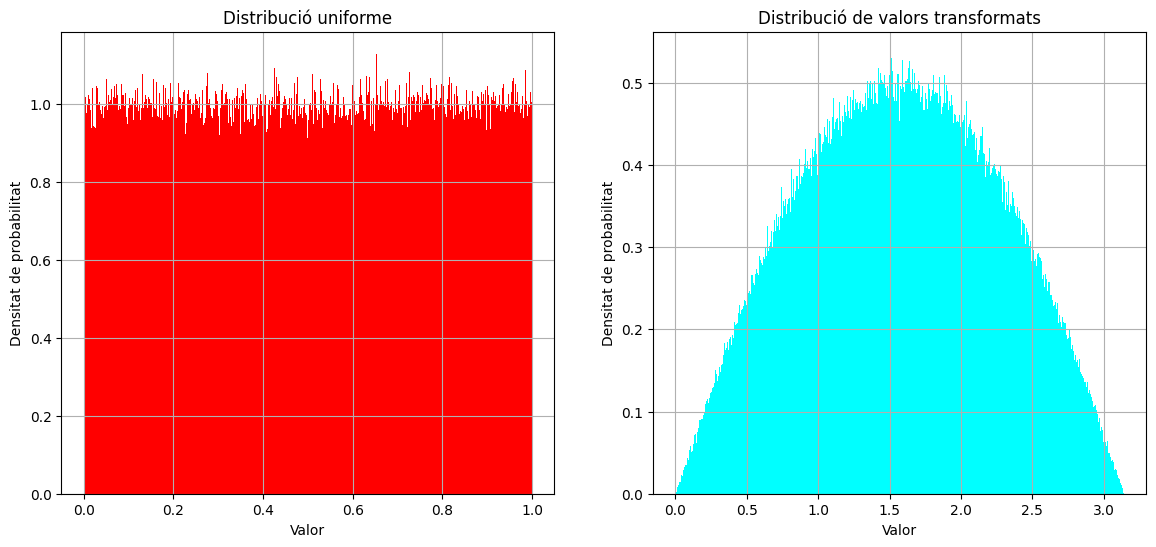

In [88]:
N = 1000000
u = stats.uniform.rvs(loc=0, scale=1, size=N)
x_trans = np.arccos(1-2*u)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(u, density=True, bins=int(np.sqrt(N)), color='red')
plt.title('Distribució uniforme')
plt.xlabel('Valor')
plt.ylabel('Densitat de probabilitat')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(x_trans, density=True, bins=int(np.sqrt(N)), color='cyan')
plt.title('Distribució de valors transformats')
plt.xlabel('Valor')
plt.ylabel('Densitat de probabilitat')
plt.grid(True)

plt.show()

### <font color='orange'>**> Python #3**</font>

Dibuixa $f(x)$ a sobre d'aquest histograma que has fet. Hauràs de normalitzar l'histograma si vols comparar amb la funció de densitat de probabilitat.

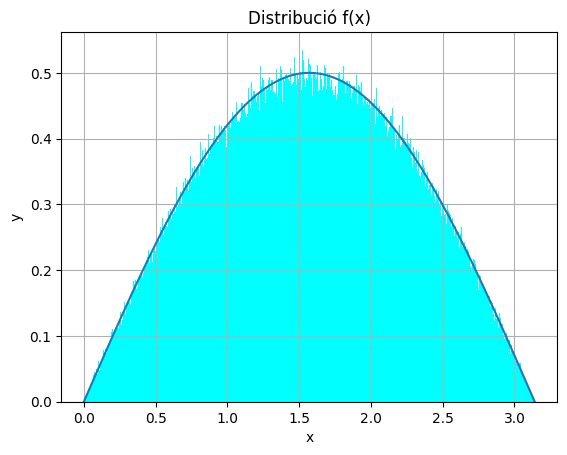

In [89]:
plt.hist(x_trans, density=True, bins=int(np.sqrt(N)), color='cyan')

plt.plot(x, distribucio(x))
plt.title('Distribució f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

### <font color='green'>**> ENTREGA**</font>


1) Fes servir el mètode de MonteCarlo per a generar uns altres $10^6$ valors que estiguin distribuïts com $f(x)$. Recorda que has de generar valors aleatoris entre o i $\pi$ en $x$, i entre el mínim i el màxim de $f(x)$ per $y$, i comparar per a cada parell de punts $(x_i,y_i)$ si queden per sota de $f(x_i)$. Si és així, ens quedem amb aquests $x_i$, que seguiràn una distribució de probabilitat $f(x)$.

ULL! Pensa quants valors aleatoris has de generar per a obtenir aproximadament $10^6$ valors que compleixin amb la condició! **[2 punts]**

Genera aquests $\sim 10^6$ valors aleatoris pel mètode de MonteCarlo que segueixin $f(x)$ i fes un histograma. **[2 punts]**

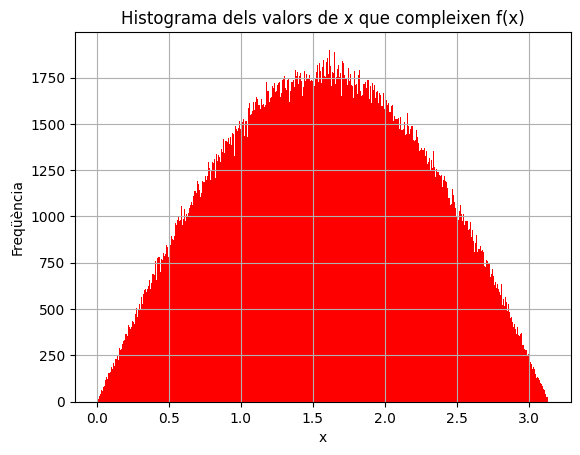

1273588


In [90]:
num_punts = 2*1000000 #necesitariem pi/2*1000000 pero necessitem un enter aixi que aproximem pi/2 a 2

punts_x = np.random.uniform(0, np.pi, num_punts)
punts_y = np.random.uniform(0, 1/2, num_punts)
dins_area = []

for i in range(len(punts_x)):
    if punts_y[i] <= (1/2)*np.sin(punts_x[i]):
        dins_area.append(True)
    else:
        dins_area.append(False)

dins_area = np.array(dins_area)

plt.hist(punts_x[dins_area], bins=int(np.sqrt(len(punts_x[dins_area]))), density=False, color='red')
plt.title('Histograma dels valors de x que compleixen f(x)')
plt.xlabel('x')
plt.ylabel('Freqüència')
plt.grid(True)
plt.show()
print(len(punts_x[dins_area]))

2) Normalitza aquest histograma, i mostra també l'histograma que has fet a l'apartat "Phython #3" i la funció $f(x)$. Tot en una única gràfica. **[2 punts]**

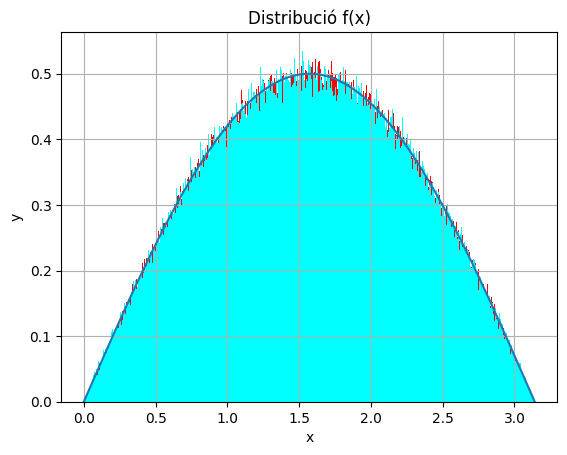

In [91]:
plt.hist(punts_x[dins_area], bins=int(np.sqrt(len(punts_x[dins_area]))), density=True, color='red')
plt.title('Histograma dels valors de x que compleixen f(x)')
plt.xlabel('x')
plt.ylabel('Freqüència')
plt.grid(True)

plt.hist(x_trans, density=True, bins=int(np.sqrt(N)), color='cyan')

plt.plot(x, distribucio(x))
plt.title('Distribució f(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

3) Farem ara el mateix, però ordenant els valors de aleatoris que has generat i fent una gràfica cumulativa en $x$ per resemblar la funció cumulativa $F(x)$. Això es fa així:

*   Ordena de menor a major els teus valors aleatoris que segueixen $f(x)$
*   Crea una altra llista pels valors en $y$ que sigui vagi de 0 a 1 en pasos de $1/N$.
*   Fes la gràfica d'aquests parells de punts, que seguiràn la distribució de probabilitat cumulativa F(x).

Fes un parell de gràfiques, per a cada mètode d'aquesta pràctica, i posa a damunt també $F(x)$. Però genera menys valors per als dos mètodes, diguem-ne N=500 perquè poguem visualitzar millor els resultats! **[4 punts]**


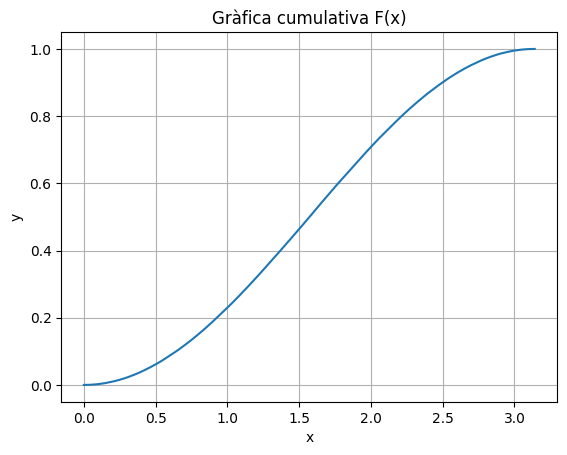

In [92]:
llista_x = punts_x[dins_area].tolist()
llista_x.sort()
#print(llista_x[0])
#print(llista_x[-1])

llista_y = np.linspace(0, 1, len(punts_x[dins_area]))

llista_x = np.insert(llista_x, 0, 0)
llista_y = np.insert(llista_y, 0, 0)

llista_x = np.append(llista_x, np.pi)
llista_y = np.append(llista_y, 1)

plt.plot(llista_x, llista_y)
plt.title('Gràfica cumulativa F(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.show()

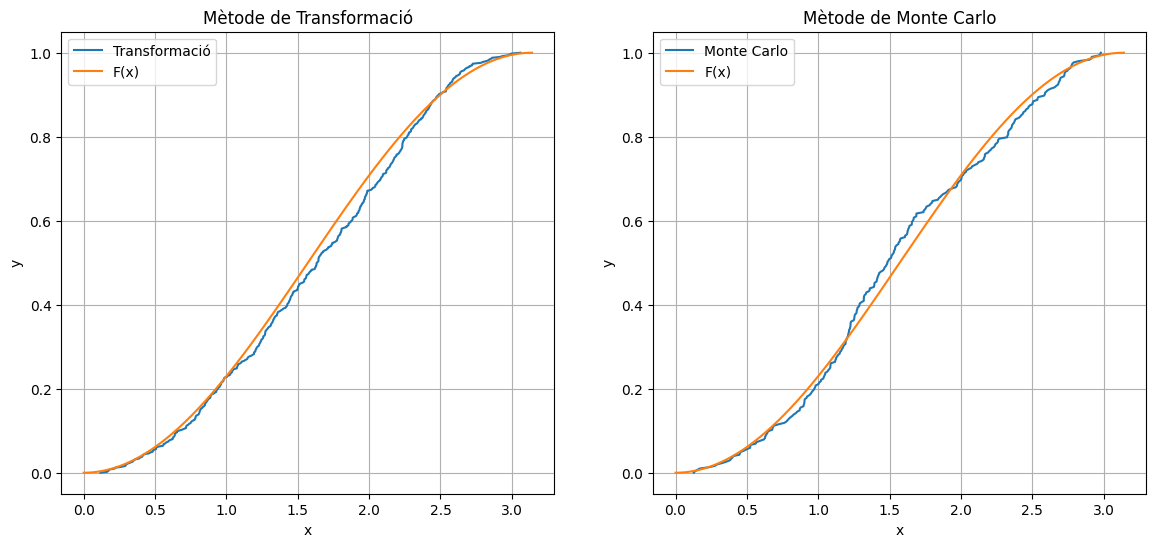

In [93]:
n = 500
u_n = stats.uniform.rvs(loc=0, scale=1, size=n)
x_transn = np.arccos(1 - 2 * u_n)
x_transn.sort()
y_transn = np.linspace(0, 1, n)

punts_xn = np.random.uniform(0, np.pi, n)
punts_yn = np.random.uniform(0, 1/2, n)
dins_arean = punts_yn <= (1/2) * np.sin(punts_xn)
x_montecarlo = punts_xn[dins_arean]
x_montecarlo.sort()
y_montecarlo = np.linspace(0, 1, len(x_montecarlo))

xn = np.linspace(0, np.pi, 500)
Fxn = acumulativa(x)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x_transn, y_transn, label='Transformació')
plt.plot(xn, Fxn, label='F(x)')
plt.title('Mètode de Transformació')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_montecarlo, y_montecarlo, label='Monte Carlo')
plt.plot(xn, Fxn, label='F(x)')
plt.title('Mètode de Monte Carlo')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.show()

<hr>

**Instruccions**

*   Primer copia aquest notebook al teu drive (Archivo>Guardar una copia en Drive).
*   Omple el teu nom, NIU i correu electrònic (gmail, si vols rebre comentaris/feedback sobre la teva entrega) a l'encapçalament d'aquest Notebook (les dues seccions si sou dos a l'equip).
*   **1 Alumne**: Canvia el nom del Notebook a "Pr3_NIU.ipynb", on NIU és el teu NIU (*per exemple: Pr3_2055007.ipynb*).
*   **2 Alumnes**: Canvia el nom del Notebook a "Pr3_NIU1_NIU2.ipynb", on NIU1 és el NIU del primer alumne, i NIU2 del segon (*per exemple: Pr3_2055007_2055004.ipynb*).
*   Ves gravant/guardant el Notebook de forma regular.
*   Al final de la classe, descarrega aquest quadern en format .ipynb i l'has de pujar al següent *drop folder*: [Link](https://cern.ch/uabmn1pr). Assegura't que el fitxer té el nom correcte.
*   Només s'avaluarà la part de l'entrega. Tindreu accés a la solució de totes les parts després d'haver entregat la pràctica.

<hr>